# Creación de proyectos para ciencia de datos

## Preparación de datos

Uno de los procesos más importantes para la ciencia de datos es la limpieza de datos, ya que a partir de este los modelos pueden aprender de mejor manera con una información bien estructurada y explicativa.

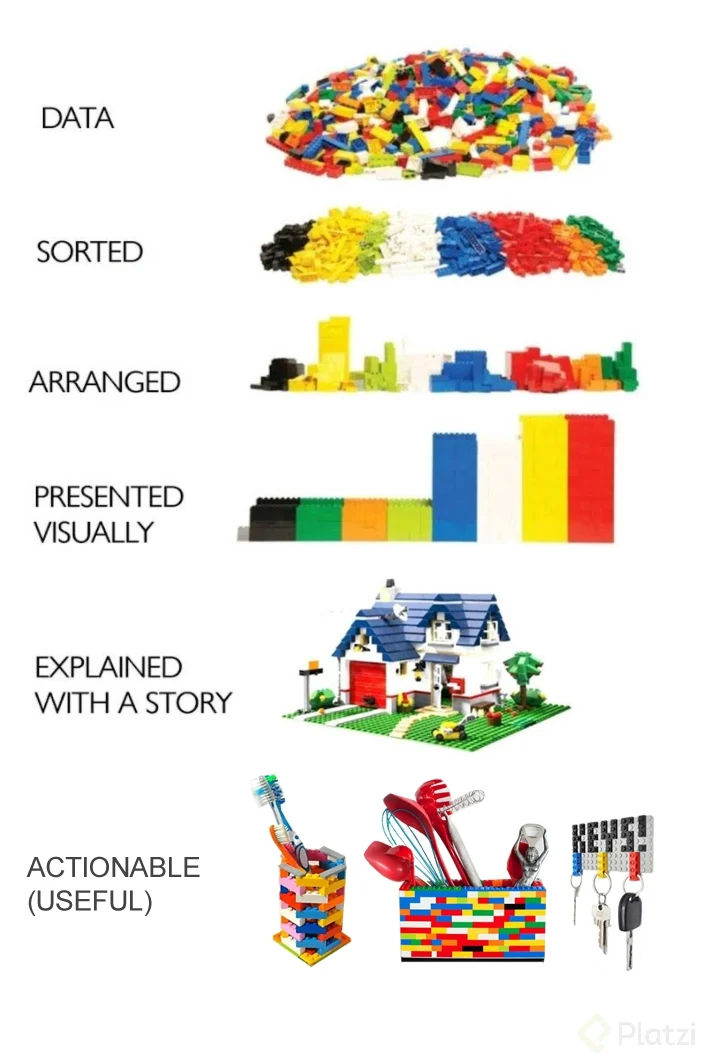

## Generar y comunicar un proyecto de datos

- Abrir una conversación
- Permite practicar

# Proyecto

Este proyecto está enfocado en un conjunto de datos sobre pacientes con su riesgo de tener [hipertensión]1(https://www.kaggle.com/datasets/khan1803115/hypertension-risk-model-ma0i0n/data)

Attributes:
male (gender)

age (age of the individual)

currentSmoker (smoking status)

cigsPerDay (number of cigarettes smoked per day)

BPMeds (blood pressure medication usage)

diabetes (diabetes status)

totChol (total cholesterol level)

sysBP (systolic blood pressure)

diaBP (diastolic blood pressure)

BMI (body mass index)

heartRate (heart rate)

glucose (glucose level)

Risk (hypertension risk status)

## Datos

### Limpieza

In [1]:
import pandas as pd
import numpy as np
import janitor

In [2]:
risk_df = pd.read_csv("./data/Hypertension-risk-model-main.csv")
risk_df

male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0        1   39              0         0.0     0.0         0    195.0  106.0   
1        0   46              0         0.0     0.0         0    250.0  121.0   
2        1   48              1        20.0     0.0         0    245.0  127.5   
3        0   61              1        30.0     0.0         0    225.0  150.0   
4        0   46              1        23.0     0.0         0    285.0  130.0   
...    ...  ...            ...         ...     ...       ...      ...    ...   
4235     0   48              1        20.0     NaN         0    248.0  131.0   
4236     0   44              1        15.0     0.0         0    210.0  126.5   
4237     0   52              0         0.0     0.0         0    269.0  133.5   
4238     1   40              0         0.0     0.0         0    185.0  141.0   
4239     0   39              1        30.0     0.0         0    196.0  133.0   

      diaBP    BMI  heartRate  glucose  Risk  
0      70.0  26.97       80.0     77.0     0  
1      81.0  28.73       95.0     76.0     0  
2      80.0  25.34       75.0     70.0     0  
3      95.0  28.58       65.0    103.0     1  
4      84.0  23.10       85.0     85.0     0  
...     ...    ...        ...      ...   ...  
4235   72.0  22.00       84.0     86.0     0  
4236   87.0  19.16       86.0      NaN     0  
4237   83.0  21.47       80.0    107.0     0  
4238   98.0  25.60       67.0     72.0     1  
4239   86.0  20.91       85.0     80.0     0  

[4240 rows x 13 columns]

In [3]:
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [4]:
risk_df["male"] = risk_df["male"].astype(object)
risk_df["currentSmoker"] = risk_df["currentSmoker"].astype(object)
risk_df["BPMeds"] = risk_df["BPMeds"].astype(object)
risk_df["diabetes"] = risk_df["diabetes"].astype(object)
risk_df["Risk"] = risk_df["Risk"].astype(object)
risk_df.dtypes

male              object
age                int64
currentSmoker     object
cigsPerDay       float64
BPMeds            object
diabetes          object
totChol          float64
sysBP            float64
diaBP            float64
BMI              float64
heartRate        float64
glucose          float64
Risk              object
dtype: object

In [5]:
risk_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [6]:
risk_df.dropna(subset=["glucose"], how="any")

male  age currentSmoker  cigsPerDay BPMeds diabetes  totChol  sysBP  \
0       1   39             0         0.0    0.0        0    195.0  106.0   
1       0   46             0         0.0    0.0        0    250.0  121.0   
2       1   48             1        20.0    0.0        0    245.0  127.5   
3       0   61             1        30.0    0.0        0    225.0  150.0   
4       0   46             1        23.0    0.0        0    285.0  130.0   
...   ...  ...           ...         ...    ...      ...      ...    ...   
4234    1   51             1        43.0    0.0        0    207.0  126.5   
4235    0   48             1        20.0    NaN        0    248.0  131.0   
4237    0   52             0         0.0    0.0        0    269.0  133.5   
4238    1   40             0         0.0    0.0        0    185.0  141.0   
4239    0   39             1        30.0    0.0        0    196.0  133.0   

      diaBP    BMI  heartRate  glucose Risk  
0      70.0  26.97       80.0     77.0    0  
1      81.0  28.73       95.0     76.0    0  
2      80.0  25.34       75.0     70.0    0  
3      95.0  28.58       65.0    103.0    1  
4      84.0  23.10       85.0     85.0    0  
...     ...    ...        ...      ...  ...  
4234   80.0  19.71       65.0     68.0    0  
4235   72.0  22.00       84.0     86.0    0  
4237   83.0  21.47       80.0    107.0    0  
4238   98.0  25.60       67.0     72.0    1  
4239   86.0  20.91       85.0     80.0    0  

[3852 rows x 13 columns]

In [7]:
# risk_df.dropna(inplace=True)

In [8]:
risk_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [9]:
for i in risk_df.columns:
    print(i)
    print(risk_df[i].unique())

male
[1 0]
age
[39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
currentSmoker
[0 1]
cigsPerDay
[ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds
[0.0 1.0 nan]
diabetes
[0 1]
totChol
[195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 342. 287. 182. 352.
 284. 217. 2

## Exploración

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
risk_df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [12]:
risk_df.describe()

age   cigsPerDay      totChol        sysBP        diaBP  \
count  4240.000000  4211.000000  4190.000000  4240.000000  4240.000000   
mean     49.580189     9.005937   236.699523   132.354599    82.897759   
std       8.572942    11.922462    44.591284    22.033300    11.910394   
min      32.000000     0.000000   107.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   263.000000   144.000000    90.000000   
max      70.000000    70.000000   696.000000   295.000000   142.500000   

               BMI    heartRate      glucose  
count  4221.000000  4239.000000  3852.000000  
mean     25.800801    75.878981    81.963655  
std       4.079840    12.025348    23.954335  
min      15.540000    44.000000    40.000000  
25%      23.070000    68.000000    71.000000  
50%      25.400000    75.000000    78.000000  
75%      28.040000    83.000000    87.000000  
max      56.800000   143.000000   394.000000

In [13]:
for i in risk_df.select_dtypes(object):
    print(risk_df[i].value_counts())
    print("-"*50)

male
0    2420
1    1820
Name: count, dtype: int64
--------------------------------------------------
currentSmoker
0    2145
1    2095
Name: count, dtype: int64
--------------------------------------------------
BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64
--------------------------------------------------
diabetes
0    4131
1     109
Name: count, dtype: int64
--------------------------------------------------
Risk
0    2923
1    1317
Name: count, dtype: int64
--------------------------------------------------


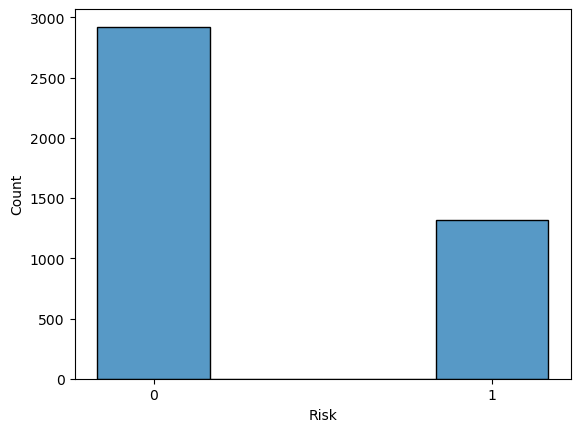

In [14]:
sns.histplot(risk_df, x="Risk", bins=4)
plt.xticks(ticks=[0.125, 0.875] ,labels=[0, 1])
plt.show()

c:\Users\shani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


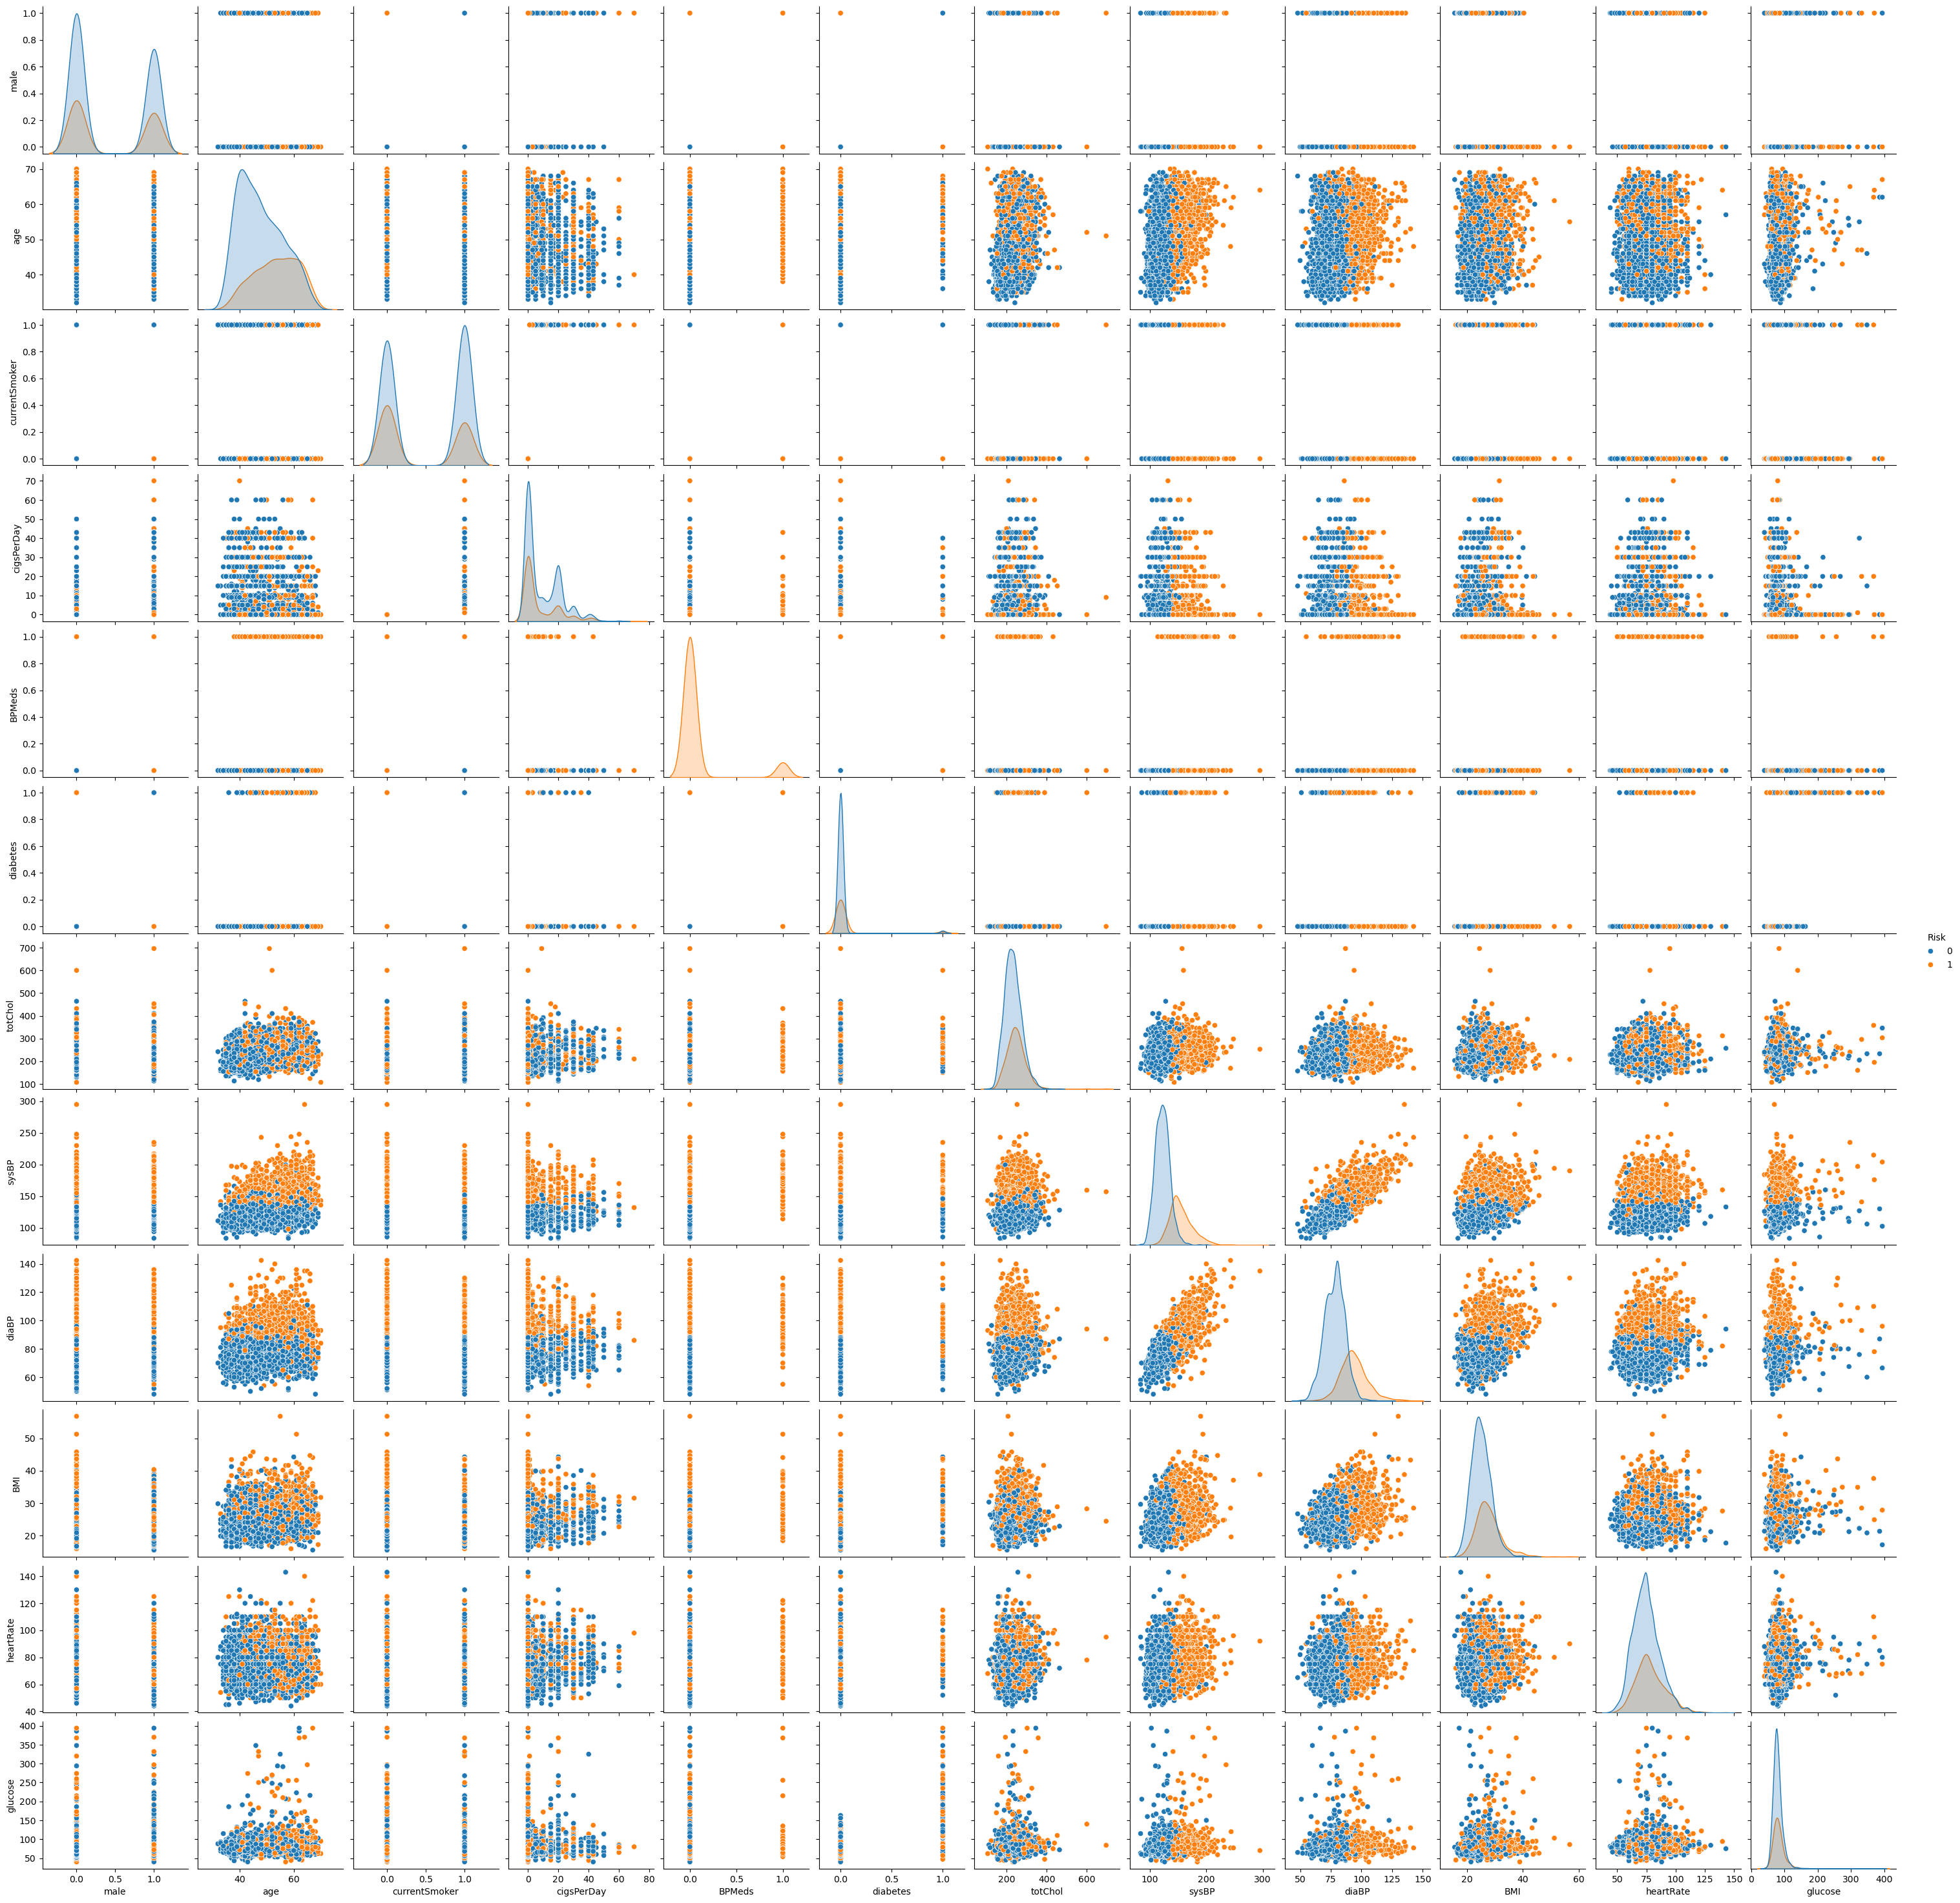

In [15]:
sns.pairplot(risk_df, hue="Risk")
plt.show()

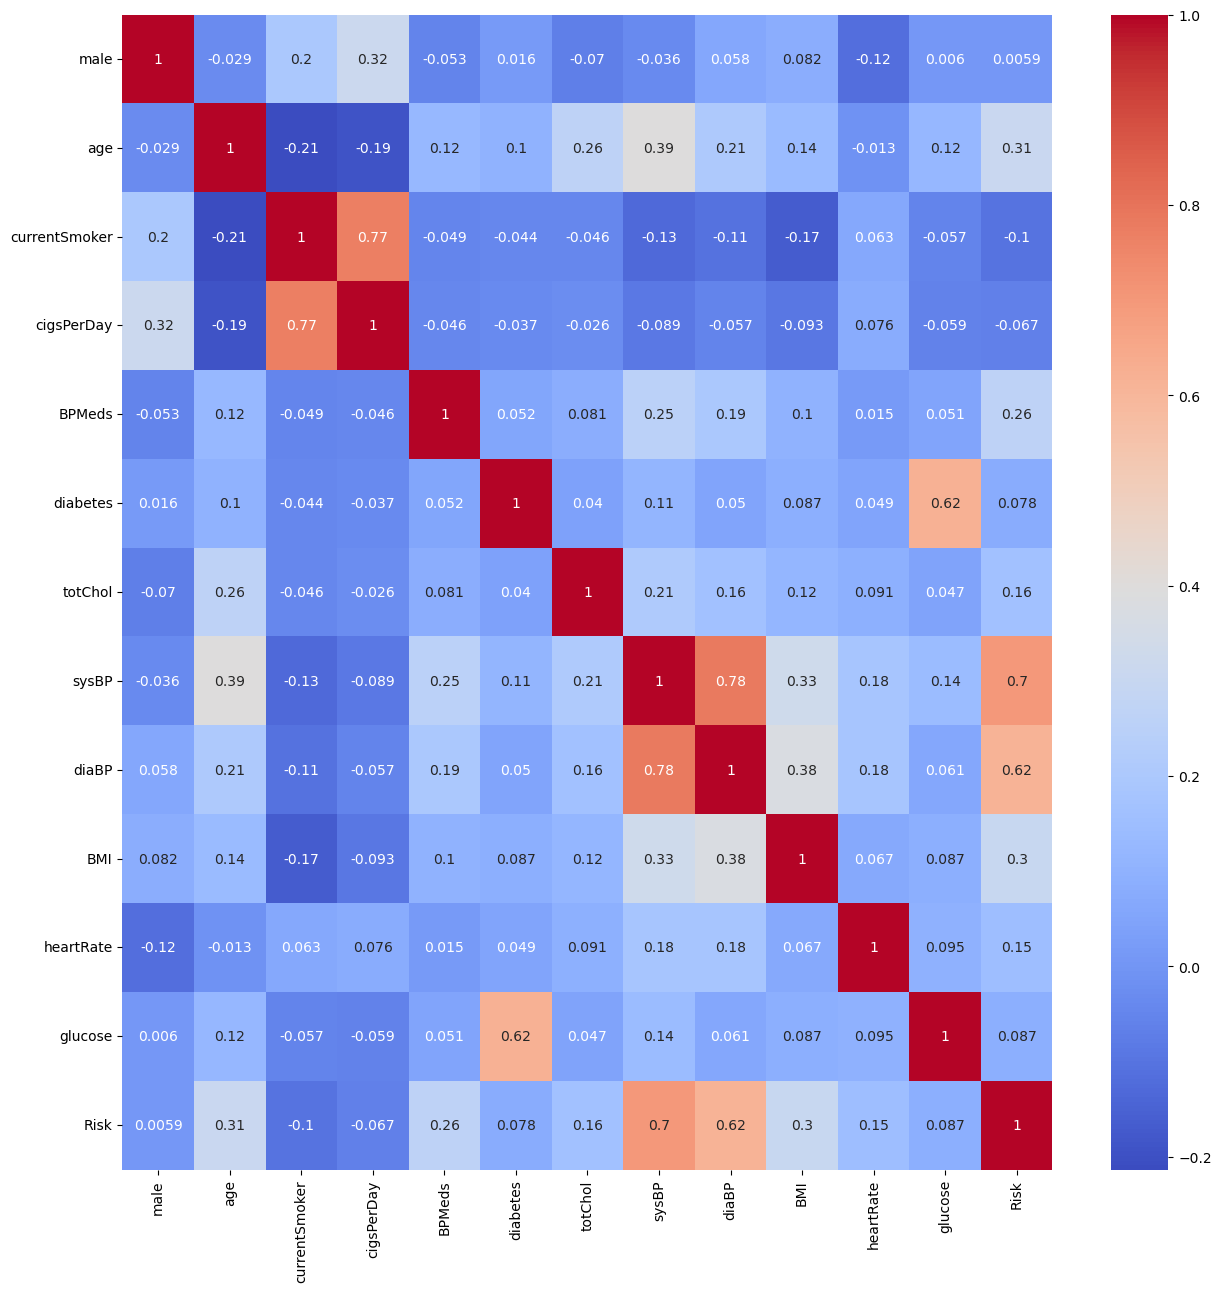

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(risk_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
risk_df["diaBP"]*risk_df["sysBP"]/(risk_df["diaBP"].mean()*risk_df["sysBP"].mean())

0       0.676273
1       0.893282
2       0.929648
3       1.298772
4       0.995270
          ...   
4235    0.859651
4236    1.003062
4237    1.009898
4238    1.259399
4239    1.042481
Length: 4240, dtype: float64

## Modelado

### Supervizado

In [18]:
from pycaret.classification import *
from sklearn.model_selection  import train_test_split

c:\Users\shani\anaconda3\Lib\site-packages\pycaret\utils\_dependencies.py:5: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


In [19]:
setup(risk_df,
      target="Risk",
      normalize=True,
      numeric_imputation="knn",
      session_id=42)
top3 = compare_models(sort = "F1", n_select=3)

In [20]:
gbc = create_model("gbc")

In [21]:
gbc_tuned = tune_model(gbc, 
                       optimize="F1",
                       search_library="optuna",
                       n_iter=25)

In [23]:
boosted_model = ensemble_model(gbc_tuned,
                               method="Boosting",
                               optimize="F1")

In [26]:
optimized_model = optimize_threshold(boosted_model,
                                     optimize="F1")

TypeError: object of type 'CustomProbabilityThresholdClassifier' has no len()

In [27]:
calibrated_model = calibrate_model(boosted_model)

In [22]:
blended_model = blend_models(top3)

Initiated  . . . . . . . . . . . . . . . . . .              11:16:27
Status     . . . . . . . . . . . . . . . . . .  Compiling Estimators
Estimator  . . . . . . . . . . . . . . . . . .     Voting Classifier

#### Separación por genero

In [21]:
risk_df

male  age currentSmoker  cigsPerDay BPMeds diabetes  totChol  sysBP  \
0       1   39             0         0.0    0.0        0    195.0  106.0   
1       0   46             0         0.0    0.0        0    250.0  121.0   
2       1   48             1        20.0    0.0        0    245.0  127.5   
3       0   61             1        30.0    0.0        0    225.0  150.0   
4       0   46             1        23.0    0.0        0    285.0  130.0   
...   ...  ...           ...         ...    ...      ...      ...    ...   
4235    0   48             1        20.0    NaN        0    248.0  131.0   
4236    0   44             1        15.0    0.0        0    210.0  126.5   
4237    0   52             0         0.0    0.0        0    269.0  133.5   
4238    1   40             0         0.0    0.0        0    185.0  141.0   
4239    0   39             1        30.0    0.0        0    196.0  133.0   

      diaBP    BMI  heartRate  glucose Risk  
0      70.0  26.97       80.0     77.0    0  
1      81.0  28.73       95.0     76.0    0  
2      80.0  25.34       75.0     70.0    0  
3      95.0  28.58       65.0    103.0    1  
4      84.0  23.10       85.0     85.0    0  
...     ...    ...        ...      ...  ...  
4235   72.0  22.00       84.0     86.0    0  
4236   87.0  19.16       86.0      NaN    0  
4237   83.0  21.47       80.0    107.0    0  
4238   98.0  25.60       67.0     72.0    1  
4239   86.0  20.91       85.0     80.0    0  

[4240 rows x 13 columns]

### No supervizado

In [45]:
from pycaret.clustering import *

In [46]:
setup(risk_df,
      ignore_features="Risk",
      normalize=True,
      numeric_imputation="knn",
      session_id=42)

In [51]:
cluster_model = create_model("meanshift", num_clusters=2)

In [53]:
assign_model(cluster_model)["Cluster"].unique()

array(['Cluster 0', 'Cluster 1', 'Cluster 18', 'Cluster 15', 'Cluster 2',
       'Cluster 14', 'Cluster 12', 'Cluster 8', 'Cluster 3', 'Cluster 16',
       'Cluster 10', 'Cluster 17', 'Cluster 4', 'Cluster 19',
       'Cluster 13', 'Cluster 5', 'Cluster 7', 'Cluster 6', 'Cluster 9',
       'Cluster 11'], dtype=object)